In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random

In [38]:
def paperRewards(alpha, gamma, beta):
    num1 = 1 + (beta * np.power(1-alpha,2) * (1-gamma))
    den1 = np.exp(beta) - 1
    exp1 = num1 / den1
    
    exp2 = exp1 + (5 * alpha) + (np.power(1-alpha, 2) * gamma) 
    exp3 = (2 * np.power(alpha, 2)) / (1-2 * alpha) - (2 * np.power(alpha,2))
    
    exp4 = exp2 + exp3
    
    num2 = alpha * (1-2*alpha) * (1 - np.exp(-beta))
    den2 = 1 - 2 * np.exp(-beta) * alpha - 3 * (1 - np.exp(-beta)) * np.power(alpha,2)
    
    exp5 = num2 / den2
    
    return exp4 * exp5

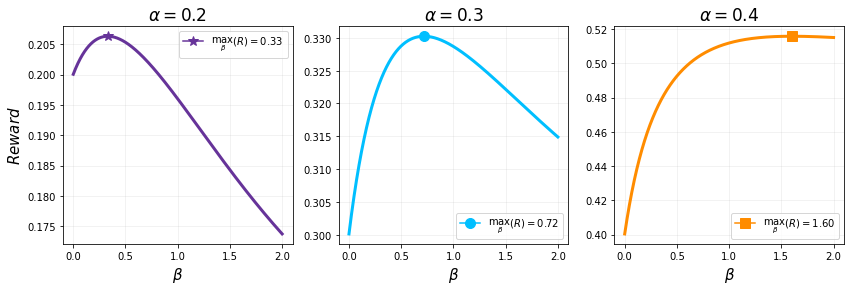

In [87]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))

betas = np.arange(0.001, 2.001, 0.001)
rews20 = [paperRewards(0.2, 0, b) for b in betas]
rews30 = [paperRewards(0.3, 0, b) for b in betas]
rews40 = [paperRewards(0.4, 0, b) for b in betas]
axarr[0].plot(betas, rews20, linewidth=3, color='rebeccapurple')
axarr[1].plot(betas, rews30, linewidth=3, color='deepskyblue')
axarr[2].plot(betas, rews40, linewidth=3, color='darkorange')

max20b, max20  = betas[np.argmax(rews20)], np.max(rews20)
max30b, max30  = betas[np.argmax(rews30)], np.max(rews30)
max40b, max40  = betas[np.argmax(rews40)], np.max(rews40)

axarr[0].plot(max20b, max20, marker='*', markersize=10, color='rebeccapurple', 
              label=r'$\max_\beta(R) = {:0.2f}$'.format(max20b))
axarr[1].plot(max30b, max30, marker='o', markersize=10, color='deepskyblue', 
              label=r'$\max_\beta(R) = {:0.2f}$'.format(max30b))
axarr[2].plot(max40b, max40, marker='s', markersize=10, color='darkorange', 
              label=r'$\max_\beta(R) = {:0.2f}$'.format(max40b))

for ax in axarr:
    ax.set_xlabel(r'$\beta$', size=15)
    ax.grid(alpha=0.2)
    ax.legend()


axarr[0].set_ylabel(r'$Reward$', size=15)
axarr[0].set_title(r'$\alpha=0.2$', size=17)
axarr[1].set_title(r'$\alpha=0.3$', size=17)
axarr[2].set_title(r'$\alpha=0.4$', size=17)
plt.show()

In [75]:
# figure 8
alphas = np.arange(0.01, 0.50, 0.01)
betas = np.arange(0.01, 5.01, 0.01)
opt_betas = []
for alpha in alphas:
    rews = [paperRewards(alpha, 0, b) for b in betas]
    opt_betas.append(betas[np.argmax(rews)])
opt_betas = np.asarray(opt_betas)

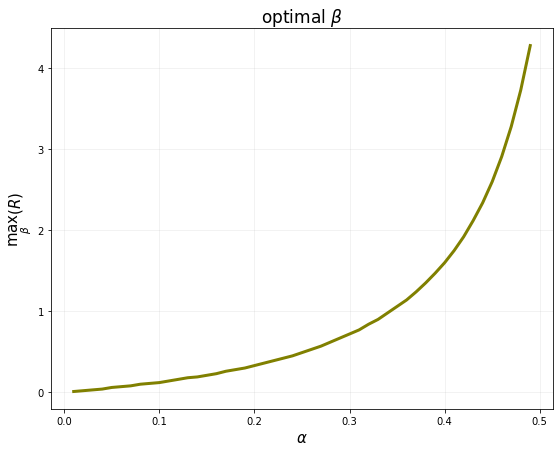

In [88]:
f, ax = plt.subplots(figsize=(9,7))

ax.plot(alphas, opt_betas, linewidth=3, color='olive')
ax.set_xlabel(r'$\alpha$', size=15)
ax.set_ylabel(r'$\max_\beta{(R)}$', size=15)
ax.set_title(r'optimal $\beta$', size=17)
ax.grid(alpha=0.2)
plt.show()

In [91]:
def selfishReward(a):
    num = a * np.power(1-a, 2) * 4 * a - np.power(a, 3)
    den = 1 - a * (1 + ((2-a) * a))
    return num / den

In [102]:
# figure 10
alphas = np.arange(0.01, 0.50, 0.01)
selfishs = [selfishReward(a) for a in alphas]
betarews = []
for a in alphas:
    rews = [paperRewards(a, 0, b) for b in betas]
    betarews.append(np.max(rews))

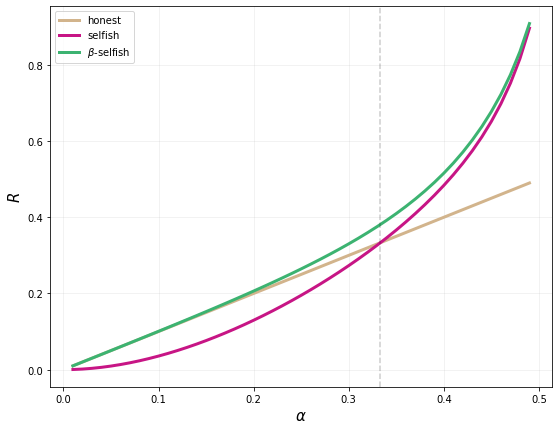

In [107]:
f, ax = plt.subplots(figsize=(9,7))

ax.plot(alphas, alphas, linewidth=3, color='tan', alpha=1, label='honest')
ax.plot(alphas, selfishs, linewidth=3, color='mediumvioletred', label='selfish')
ax.plot(alphas, betarews, linewidth=3, color='mediumseagreen', label=r'$\beta$-selfish')

ax.set_xlabel(r'$\alpha$', size=15)
ax.set_ylabel(r'$R$', size=15)
ax.axvline(1/3, alpha=0.2, color='k', linestyle='--')
ax.grid(alpha=0.2)
ax.legend()

plt.show()

In [180]:
# adding our rewards
def calcP1(a, b):
    num = a * (2*a-1) * (np.exp(b)-1)
    den = 3 * np.power(a,2) * (np.exp(b)-1) + (2*a) - np.exp(b)
    return num / den

def calcH(a, b):
    exp1 = (1-a) / (a * (1 - np.exp(-b)))
    exp2 = 2 * np.power(1-a, 2)
    exp3 = a * (1-a)
    return calcP1(a,b) * (exp1 + exp2 + exp3)

def calcA(a, b):
    exp1 = a * (4-7*a) / (1-2*a)
    exp2 = 1 / (np.exp(b) - 1)
    return calcP1(a,b) * (exp1 + exp2)

# def calcA2(a, b):
#     exp1 = (a * np.exp(-b)) / (a * (1 - np.exp(-b)))
#     exp2 = 2 * a * (1-a)
#     exp3 = np.power(a,2) + a
#     exp4 = a * (2-a) / (1-a)
#     exp5 = sum([np.power(a/(1-a), i-1) * a for i in range(3, 40)])
#     return calcP1(a,b) * (exp1 + exp2 + exp3 + exp4 + exp5)

def calcAOverAH(a, b):
    return calcA(a,b) / (calcA(a,b) + calcH(a,b))

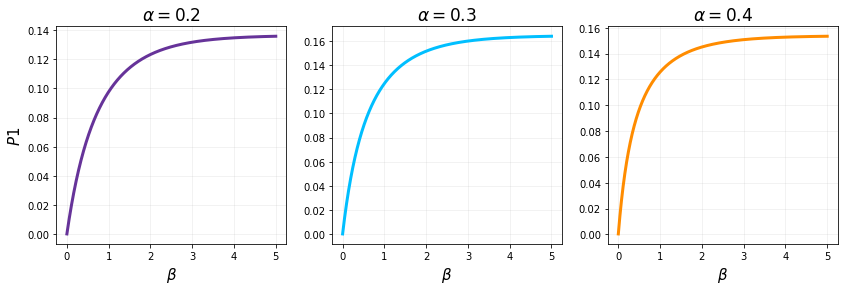

In [182]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))

betas = np.arange(0.001, 5.001, 0.001)
p1s20 = [calcP1(0.2, b) for b in betas]
p1s30 = [calcP1(0.3, b) for b in betas]
p1s40 = [calcP1(0.4, b) for b in betas]
axarr[0].plot(betas, p1s20, linewidth=3, color='rebeccapurple')
axarr[1].plot(betas, p1s30, linewidth=3, color='deepskyblue')
axarr[2].plot(betas, p1s40, linewidth=3, color='darkorange')

for ax in axarr:
    ax.set_xlabel(r'$\beta$', size=15)
    ax.grid(alpha=0.2)

axarr[0].set_ylabel(r'$P1$', size=15)
axarr[0].set_title(r'$\alpha=0.2$', size=17)
axarr[1].set_title(r'$\alpha=0.3$', size=17)
axarr[2].set_title(r'$\alpha=0.4$', size=17)
plt.show()

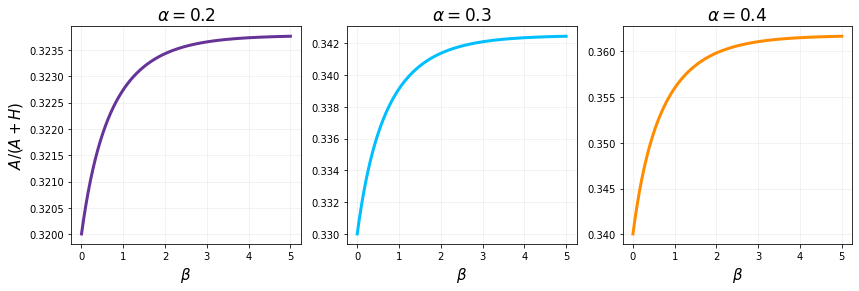

In [187]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))

betas = np.arange(0.001, 5.001, 0.001)
aover20 = [calcAOverAH(0.32, b) for b in betas]
aover30 = [calcAOverAH(0.33, b) for b in betas]
aover40 = [calcAOverAH(0.34, b) for b in betas]
axarr[0].plot(betas, aover20, linewidth=3, color='rebeccapurple')
axarr[1].plot(betas, aover30, linewidth=3, color='deepskyblue')
axarr[2].plot(betas, aover40, linewidth=3, color='darkorange')

for ax in axarr:
    ax.set_xlabel(r'$\beta$', size=15)
    ax.grid(alpha=0.2)

axarr[0].set_ylabel(r'$A/(A+H)$', size=15)
axarr[0].set_title(r'$\alpha=0.2$', size=17)
axarr[1].set_title(r'$\alpha=0.3$', size=17)
axarr[2].set_title(r'$\alpha=0.4$', size=17)
plt.show()

In [225]:
def calcTotalReward(a, b, scale=1):
    return (scale*paperRewards(a, 0, b) + calcAOverAH(a, b)) / (scale + 1)

In [243]:
# NEWFIGURE :)
alphas = np.arange(0.01, 0.50, 0.01)
betas = np.arange(0.01, 5.01, 0.01)
selfishs = [selfishReward(a) for a in alphas]
betarews = []
prop = 4
for a in tqdm(alphas):
    rews = [paperRewards(a, 0, b) for b in betas]
    bestBeta = betas[np.argmax(rews)]
    betarews.append(calcTotalReward(a, bestBeta, scale=prop))
fusionrs = [] 
for a in tqdm(alphas):
    rews = [calcTotalReward(a, b, scale=prop) for b in betas]
    fusionrs.append(np.max(rews))

100%|██████████| 49/49 [00:01<00:00, 28.75it/s]


In [244]:
# np.array(fusionrs) - np.array(betarews)
np.min(alphas[np.array(fusionrs) - alphas > 0])

0.15000000000000002

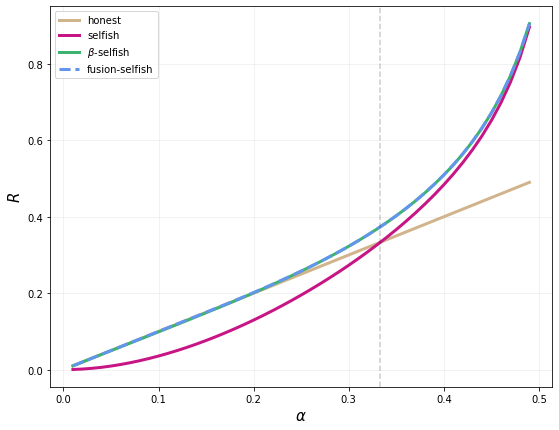

In [245]:
f, ax = plt.subplots(figsize=(9,7))

ax.plot(alphas, alphas, linewidth=3, color='tan', alpha=1, label='honest')
ax.plot(alphas, selfishs, linewidth=3, color='mediumvioletred', label='selfish')
ax.plot(alphas, betarews, linewidth=3, color='mediumseagreen', label=r'$\beta$-selfish')
ax.plot(alphas, fusionrs, linewidth=3, color='cornflowerblue', label=r'fusion-selfish', linestyle='--')

ax.set_xlabel(r'$\alpha$', size=15)
ax.set_ylabel(r'$R$', size=15)
ax.axvline(1/3, alpha=0.2, color='k', linestyle='--')
ax.grid(alpha=0.2)
ax.legend()

plt.show()

In [229]:
# various scales
scales = np.arange(1, 11)
alphas = np.arange(0.01, 0.50, 0.01)
betas = np.arange(0.01, 5.01, 0.01)
selfishs = [selfishReward(a) for a in alphas]
betarews = []
profvals = []
for s in scales:
    fusionrs = [] 
    for a in tqdm(alphas):
        rews = [calcTotalReward(a, b, scale=s) for b in betas]
        fusionrs.append(np.max(rews))
    profvals.append(np.min(alphas[np.array(fusionrs) - alphas > 0]))

100%|██████████| 49/49 [00:01<00:00, 27.40it/s]


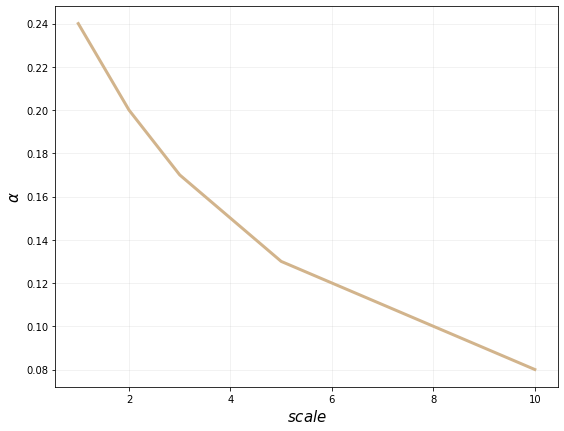

In [230]:
f, ax = plt.subplots(figsize=(9,7))

ax.plot(scales, profvals, linewidth=3, color='tan', alpha=1)
ax.set_xlabel(r'$scale$', size=15)
ax.set_ylabel(r'$\alpha$', size=15)
ax.grid(alpha=0.2)
# ax.legend()

plt.show()

In [26]:
alpha = 0.4
iters = int(1e6)

In [27]:
# selfish policy
state = 0
attacker_rews = 0
for x in tqdm(range(iters)):
    winner = np.random.choice([0, 1], p=[1-alpha, alpha])
    if state == 1 and winner == 0:
        tiebreak = np.random.choice([0, 1], p=[1-alpha, alpha])
        if tiebreak: 
            attacker_rews += 2
        state = 0
    elif state == 2 and winner == 0:
        attacker_rews += 2
        state == 0
    elif state == 0 and winner == 0:
        state += 1
    elif winner == 1:
        state += 1
    elif winner == 0:
        state -= 1
    else:
        raise KeyError

attacker_rews / iters

100%|██████████| 1000000/1000000 [00:30<00:00, 32274.17it/s]


0.397828